<a href="https://colab.research.google.com/github/05aradhanasingh/rhodonea-function/blob/main/nih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import GroupShuffleSplit
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/nih/sample/sample_labels.csv'
data = pd.read_csv(file_path)
data.head()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [ ]:
print(f'Total Rows in Dataset: {len(data)}')

Total Rows in Dataset: 5606


In [ ]:
print(data.columns)


Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacing_x',
       'OriginalImagePixelSpacing_y'],
      dtype='object')


In [ ]:
all_labels = data['Finding Labels'].str.split('|').explode().unique()

# Print unique finding labels
print('Unique Finding Labels:')
for label in all_labels:
    print(label)

Unique Finding Labels:
Emphysema
Infiltration
Pleural_Thickening
Pneumothorax
Cardiomegaly
No Finding
Atelectasis
Edema
Effusion
Consolidation
Mass
Nodule
Fibrosis
Pneumonia
Hernia


In [ ]:
folder_path = '/content/drive/MyDrive/nih/sample/images/'
all_files = os.listdir(folder_path)

image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
image_paths = [os.path.join(folder_path, img) for img in image_files[:2]]

print("Image paths:", image_paths)

Image paths: ['/content/drive/MyDrive/nih/sample/images/00022893_000.png', '/content/drive/MyDrive/nih/sample/images/00023162_023.png']


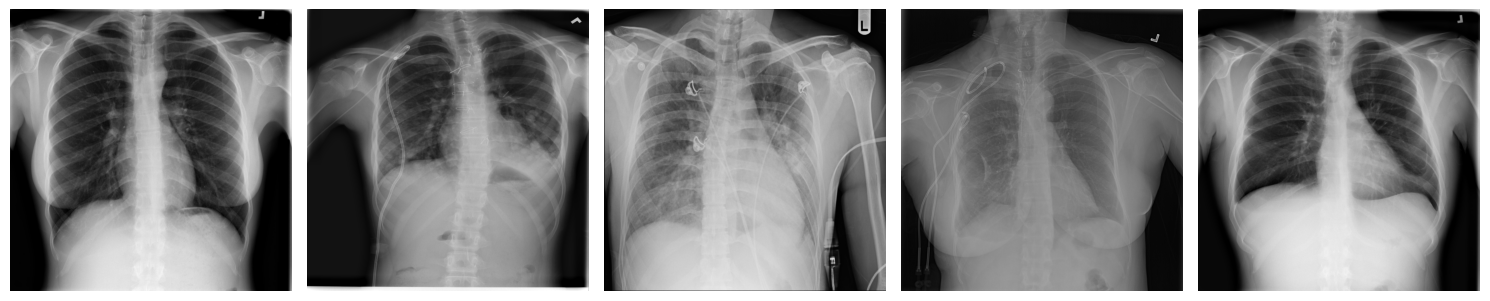

In [ ]:
folder_path = '/content/drive/MyDrive/nih/sample/images/'

all_files = os.listdir(folder_path)
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

plt.figure(figsize=(15, 10))  # Set figure size
for i, img_file in enumerate(image_files[:5]):
    img_path = os.path.join(folder_path, img_file)  # Construct full path
    img = cv2.imread(img_path)  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib
    plt.subplot(1, 5, i + 1)  # Create a subplot for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axes


plt.tight_layout()
plt.show()


In [ ]:
data.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacing_x',
       'OriginalImagePixelSpacing_y'],
      dtype='object')

In [ ]:
 import pandas as pd

# Assuming data is already loaded and 'Finding Labels' has been split
# Ensure no leading or trailing spaces in column names
data.columns = data.columns.str.strip()

# Get a list of all unique diseases/labels in the dataset
all_labels = set([label for sublist in data['Finding Labels'] for label in sublist])

# Create new columns for each label and set them to 1 if the label is present, else 0
for label in all_labels:
    data[label] = data['Finding Labels'].apply(lambda x: 1 if label in x else 0)

# Drop the original 'Finding Labels' column as it is now split
data.drop('Finding Labels', axis=1, inplace=True)

data.head()



,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,...,C,n,o,r,f,e,u,x,t,I
0,00000013_005.png,5,13,060Y,M,AP,3056,2544,0.139000,0.139000,...,0,1,1,1,1,1,1,1,1,1
1,00000013_026.png,26,13,057Y,M,AP,2500,2048,0.168000,0.168000,...,1,0,1,1,0,1,0,0,0,0
2,00000017_001.png,1,17,077Y,M,AP,2500,2048,0.168000,0.168000,...,0,1,1,0,0,0,0,0,0,0
3,00000030_001.png,1,30,079Y,M,PA,2992,2991,0.143000,0.143000,...,0,0,0,0,0,1,0,0,1,0
4,00000032_001.png,1,32,055Y,F,AP,2500,2048,0.168000,0.168000,...,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311,...,0,1,1,0,0,0,0,0,0,0
5602,00030786_005.png,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000,...,1,1,1,1,1,1,1,0,0,0
5603,00030789_000.png,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311,...,0,1,1,1,1,0,0,0,1,1
5604,00030792_000.png,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
numerical_columns = ['OriginalImageWidth', 'OriginalImageHeight',
                     'OriginalImagePixelSpacing_x', 'OriginalImagePixelSpacing_y']

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data[numerical_columns].head()

,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,0.889706,0.755024,0.286396,0.286396
1,0.597689,0.517703,0.632458,0.632458
2,0.597689,0.517703,0.632458,0.632458
3,0.856092,0.968900,0.334129,0.334129
4,0.597689,0.517703,0.632458,0.632458


In [ ]:
# Function to split the data into training, validation, and test sets based on Patient ID
def group_split_three_sets(df, group_col, train_size=0.6, val_size=0.2, test_size=0.2):  # Updated sizes to sum to 1
    # Check that the sum of sizes equals 1
    if train_size + val_size + test_size != 1:
        raise ValueError("train_size + val_size + test_size must sum to 1")

    # Split into training and remaining (validation + test)
    gss = GroupShuffleSplit(n_splits=1, train_size=train_size, test_size=1 - train_size, random_state=42)  # Corrected test_size
    groups = df[group_col]

    for train_idx, temp_idx in gss.split(df, groups=groups):
        train_data = df.iloc[train_idx]
        temp_data = df.iloc[temp_idx]

    # Split the remaining data into validation and test sets
    gss2 = GroupShuffleSplit(n_splits=1, train_size=val_size / (val_size + test_size), test_size=test_size / (val_size + test_size), random_state=42)
    groups2 = temp_data[group_col]

    for val_idx, test_idx in gss2.split(temp_data, groups=groups2):
        val_data = temp_data.iloc[val_idx]
        test_data = temp_data.iloc[test_idx]

    return train_data, val_data, test_data

# Apply the function to the full dataset
train_data, val_data, test_data = group_split_three_sets(data, group_col='Patient ID')

# Output the split dataset sizes
print(f'Training Data: {len(train_data)} rows')
print(f'Validation Data: {len(val_data)} rows')
print(f'Test Data: {len(test_data)} rows')

# Ensure no overlap in Patient IDs between the three sets
assert set(train_data['Patient ID']).isdisjoint(set(val_data['Patient ID']))
assert set(train_data['Patient ID']).isdisjoint(set(test_data['Patient ID']))
assert set(val_data['Patient ID']).isdisjoint(set(test_data['Patient ID']))

# Optionally save the datasets to CSV files (if needed)
print(f'Total Rows in Dataset: {len(data)}')
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Training Data: 3359 rows
Validation Data: 1125 rows
Test Data: 1122 rows
Total Rows in Dataset: 5606


**Creating a function 'check_for_leakage' to check for leakage between the train, test, or validation datasets**

Leakage might occur if the same Patient ID appears in both training and/or validation dataset. This could allow the model to become familiar with the patient's information, which would lead to better performance on the test set but poor generalization to new data.


In [ ]:
df1=pd.read_csv('train_data.csv')
df2=pd.read_csv('val_data.csv')
df3=pd.read_csv('test_data.csv')

def check_for_leakage(df1, df2, patient_id_col):

    df1_patients_unique = set(df1['Patient ID'].values)
    df2_patients_unique = set(df2['Patient ID'].values)

    patients_in_both_groups = df1_patients_unique.intersection(df2_patients_unique)

    leakage = len(patients_in_both_groups) > 0

    return leakage

In [ ]:
print(f"Leakage between train and test: {check_for_leakage(train_data, test_data, 'PatientId')}")
print(f"Leakage between valid and test: {check_for_leakage(val_data, test_data, 'PatientId')}")


Leakage between train and test: False
Leakage between valid and test: False


In [ ]:
# Print columns in your train, validation, and test data to check for discrepancies
print(train_data.columns)
print(val_data.columns)
print(test_data.columns)


Index(['Image Index', 'Follow-up #', 'Patient ID', 'Patient Age',
       'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacing_x',
       'OriginalImagePixelSpacing_y', 'k', 'H', 'F', 'T', 'l', 'a', 'P', 'c',
       'M', '|', 'b', 'y', 'd', 'N', 'i', ' ', 'h', 'm', 'g', 'A', 'p', 'E',
       's', '_', 'C', 'n', 'o', 'r', 'f', 'e', 'u', 'x', 't', 'I'],
      dtype='object')
Index(['Image Index', 'Follow-up #', 'Patient ID', 'Patient Age',
       'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacing_x',
       'OriginalImagePixelSpacing_y', 'k', 'H', 'F', 'T', 'l', 'a', 'P', 'c',
       'M', '|', 'b', 'y', 'd', 'N', 'i', ' ', 'h', 'm', 'g', 'A', 'p', 'E',
       's', '_', 'C', 'n', 'o', 'r', 'f', 'e', 'u', 'x', 't', 'I'],
      dtype='object')
Index(['Image Index', 'Follow-up #', 'Patient ID', 'Patient Age',
       'Patient Gender', 'View Position', 'OriginalImageWidth'